# Regression Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('br_data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [4]:
#!pip install tensorflow
#!pip install keras
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 9))

# Adding the second hidden layer
rnn.add(Dense(5, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [6]:
# Fitting the ANN to the Training set
grafik = rnn.fit(X_train, y_train, batch_size = 10,validation_data=(X_test, y_test), epochs = 5)

Epoch 1/5
6/6 [==============================] - 1s 47ms/step - loss: 0.7689 - accuracy: 0.0000e+00 - val_loss: 0.6655 - val_accuracy: 0.0000e+00
Epoch 2/5
6/6 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.0000e+00 - val_loss: 0.6710 - val_accuracy: 0.0000e+00
Epoch 3/5
6/6 [==============================] - 0s 7ms/step - loss: 0.7367 - accuracy: 0.0000e+00 - val_loss: 0.6736 - val_accuracy: 0.0000e+00
Epoch 4/5
6/6 [==============================] - 0s 6ms/step - loss: 0.7230 - accuracy: 0.0000e+00 - val_loss: 0.6789 - val_accuracy: 0.0000e+00
Epoch 5/5
6/6 [==============================] - 0s 7ms/step - loss: 0.7131 - accuracy: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.0000e+00


In [7]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

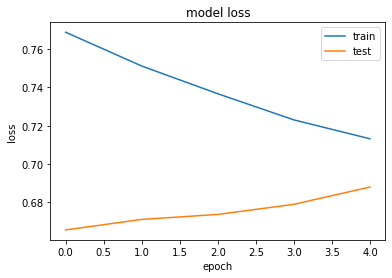

In [8]:

# Plotting loss & accuracy
plt.figure()
plt.plot(grafik.history['loss'])
plt.plot(grafik.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [9]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [10]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(1954.221, 1930.79)

Нейроння сеть справилась с задачей лучшим образом (подобраны оптимальные значения параметров), поэтому для работы приоритетней брать ее. Далее сделано построение нейронной сети на всех переменных

In [13]:

# Importing the dataset
df = pd.read_csv('br_prep.csv', sep=';')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,1,0,1,0,659,0,1092.0,0,0,0,0,1,13884.0
1,1,1,0,1,1,1518,1,348.0,0,0,0,1,1,11700.0
2,2,1,0,1,0,476,2,504.0,0,0,0,1,1,6786.0
3,3,1,0,1,0,1310,3,418.0,0,0,0,1,1,12948.0
4,4,1,1,1,2,2029,4,108.0,0,0,0,0,0,11427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,49,1,0,2,2,6884,56,337.0,0,0,0,0,0,9399.0
65,8,1,0,1,13,4721,57,668.0,0,1,1,0,0,14079.0
66,50,1,0,1,0,3286,58,295.0,0,0,0,0,0,11427.0
67,51,1,1,2,7,3963,59,0.0,0,1,1,0,0,13338.0


In [14]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('br_data_reg1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [16]:
# Importing prepared dataset
import pickle
input = open('br_data_reg1.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [18]:
#!pip install tensorflow
#!pip install keras
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
# Initialising the ANN
rnn_all = Sequential()

# Adding the input layer and the first hidden layer
rnn_all.add(Dense(14, activation = 'tanh', input_dim = 13))

# Adding the second hidden layer
rnn_all.add(Dense(7, activation = 'tanh'))

# Adding the output layer
rnn_all.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn_all.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [21]:
# Fitting the ANN to the Training set
grafik1 = rnn_all.fit(X_train, y_train, batch_size = 10,validation_data=(X_test, y_test), epochs = 5)

Epoch 1/5
6/6 [==============================] - 1s 27ms/step - loss: 1.2382 - accuracy: 0.0000e+00 - val_loss: 1.2709 - val_accuracy: 0.0000e+00
Epoch 2/5
6/6 [==============================] - 0s 8ms/step - loss: 1.1850 - accuracy: 0.0000e+00 - val_loss: 1.2243 - val_accuracy: 0.0000e+00
Epoch 3/5
6/6 [==============================] - 0s 7ms/step - loss: 1.1365 - accuracy: 0.0000e+00 - val_loss: 1.1860 - val_accuracy: 0.0000e+00
Epoch 4/5
6/6 [==============================] - 0s 7ms/step - loss: 1.0958 - accuracy: 0.0000e+00 - val_loss: 1.1510 - val_accuracy: 0.0000e+00
Epoch 5/5
6/6 [==============================] - 0s 7ms/step - loss: 1.0572 - accuracy: 0.0000e+00 - val_loss: 1.1228 - val_accuracy: 0.0000e+00


In [22]:
# Predicting the Test set results
y_pred_all = rnn_all.predict(X_test)

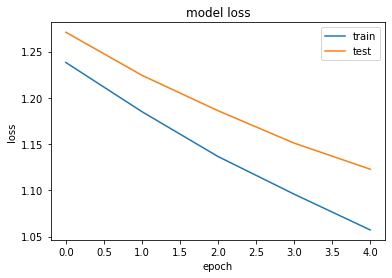

In [23]:

# Plotting loss & accuracy
plt.figure()
plt.plot(grafik1.history['loss'])
plt.plot(grafik1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [24]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred_all)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [26]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn_all.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(2367.981, 1930.79)

ВЫВОДЫ: Нейронная сеть на всех переменных справилась хуже, нежели на значимых. Таким образом - лучшая моделью является первая Нейронная Сеть, но в целом качество всех моделей на низком уровне, для построения адекватной модели нужно больше входных данных.